# Titanic Project

## Data Set Information:

### Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

## Importing the required libraries:

In [430]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler,power_transform,MinMaxScaler,PowerTransformer,OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [431]:
df = pd.read_csv('titanic_project5.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA (Exploratory Data Analysis):

In [432]:
df.shape

(891, 12)

We have 891 rows and 12 columns

In [433]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Name, Sex, Ticket ,Cabin, Embarked are object Datatype, Rest are Int and Float

In [434]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [436]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 null values in Age,687 null values in Cabin and 2 in Embarked

In [437]:
#Lets check the skewness of the data
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

There are three columns, which has skewness

We can ignore Fare and Parch column since there are ordinal values

Fare column we need to take care

## Removing Unnecessary Columns

In [438]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

1. PassengerId Column can be revomed beacuse it is of no use to predict the target varibale

2. Name Column can be revomed beacuse it is of no use to predict the target varibale

3. Ticket Column can be revomed beacuse it is of no use to predict the target varibale

4. Cabin Column can be revomed beacuse it has 80 percent of missing values(null values) of no use to predict the target varibale

In [439]:
miss_value_percentage = df['Cabin'].isnull().sum()/df.shape[0]
miss_value_percentage

0.7710437710437711

In [440]:
#lets drop the unwanted columns
df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1,inplace =True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Handing Null Values

In [441]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We have two columns with null values: Age and Embarked

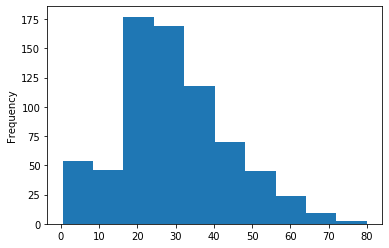

In [442]:
df['Age'].plot(kind = 'hist')

Data is Right skewed, So lets Rplace the nan values with median

In [443]:
#Age is float datatype, so lets replace null values with with median since the data is skewed
df['Age'] = df['Age'].fillna(df['Age'].median())

In [444]:
#Embarked is a Object Column , So lets replace the null values with Mode

In [445]:
a = df.Embarked.mode()
mode = a[0]
df['Embarked'] = df.Embarked.fillna(mode)

In [446]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now there are no null values

## Encoding the object type columns

In [447]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Sex and Embarked columns have Object datatype

In [448]:
encoding = OrdinalEncoder()

In [449]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = encoding.fit_transform(df[i].values.reshape(-1,1))

In [450]:
df.dtypes

Survived      int64
Pclass        int64
Sex         float64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

Now everything is int or float

### Statistical Summary

In [451]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### Insight Obtained from this Table :

we check outliers only age and fare column , because all the other columns are ordinal values

Age and Fare columns is having lot of difrence between 75th percenticle and max, Outliers might be there

There are no null values in any columns

## Data Visualizaion

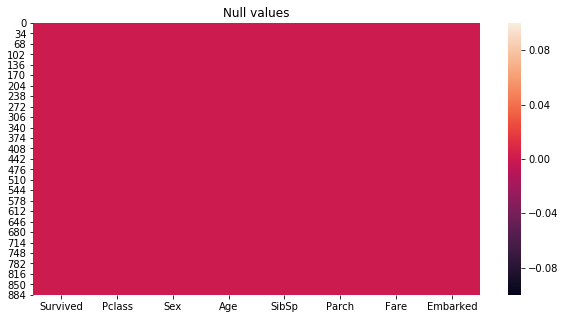

In [452]:
#checking the missing values with visualization technique
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

There are no null Values

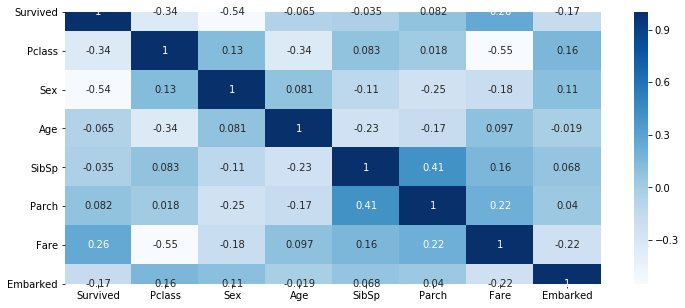

In [453]:
#checking for correlation between all columns
fig = plt.figure(figsize=(12,5))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

We can see -0.54 is high negative correlation for target variable with Sex column

In [454]:
#lets check for the correlation of input columns with Target Variable
cor_matrix['Survived'].sort_values(ascending = False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

Age and SibSp is ahving least correlation

These columns are having correlation almost equal to zero, So we can drop this column.
Since Dropping columns based on Correlation is our last option. Lets continue the Data visualizaion process

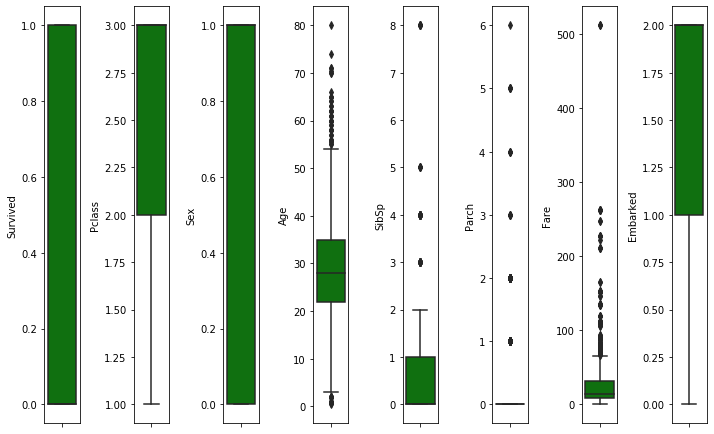

In [455]:
# lets check for outliers among all the columns
collist =df.columns
ncol = 12
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

We can only check outliers for Age and Fare column, because other columns are having ordinal values

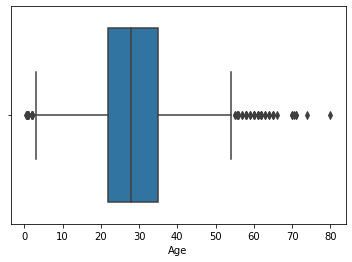

In [456]:
#Checking for Outliers for Age column seperately
sns.boxplot(df['Age'])

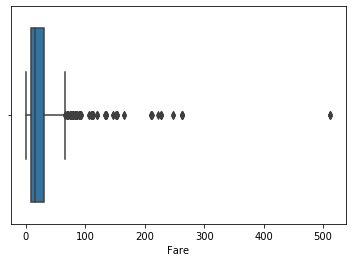

In [457]:
#Checking for Outliers for Fare column seperately
sns.boxplot(df['Fare'])

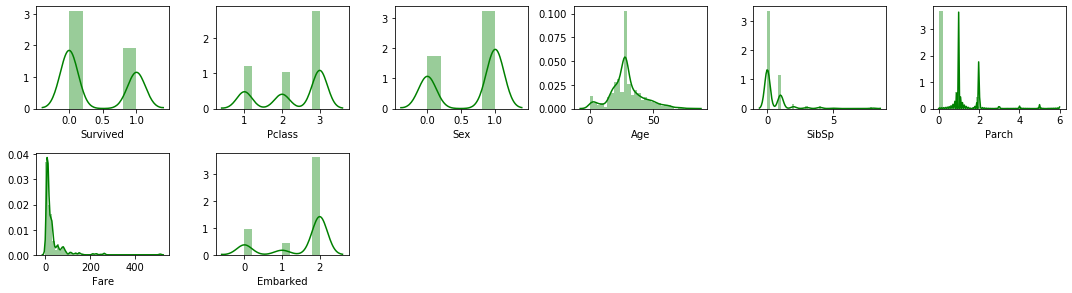

In [458]:
# Lets check the distribution
collist =df.columns
ncol = 6
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

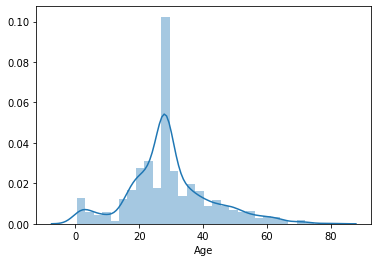

In [459]:
# Lets check the distribution for Age column seperately
sns.distplot(df['Age'])

It looks like almost normal distributed

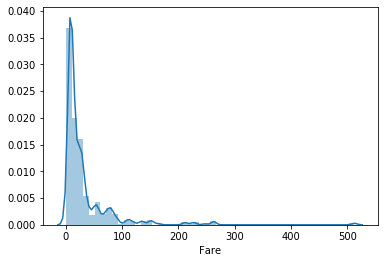

In [460]:
# Lets check the distribution for Fare column seperately
sns.distplot(df['Fare'])

It is completely right skewed

### checking for class imbalnce problem

0    549
1    342
Name: Survived, dtype: int64


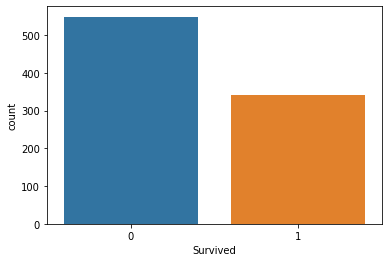

In [461]:
sns.countplot(df.Survived)
print(df.Survived.value_counts())

we can see there is no class imbalnce problem

## Data Preprocessing

### Oulier Removal :

We are Performing Outlier Removal for only two columns : Age and Fare , Because other columns are ordinal

In [462]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 3)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 3)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [463]:
##Function of outlier Removal when data looks like normal distributed.
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [464]:
#Age is normal distributed so lets this function
outliers_normally(df,'Age')

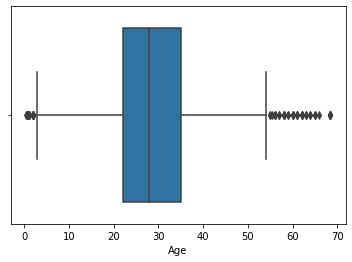

In [465]:
#Checking for Outliers for Age column seperately
sns.boxplot(df['Age'])

some outliers have been replaced with lower and upper whiskers

In [466]:
#Fare is Right skewd so lets use this fuction
outliers_IQR3(df,'Fare')

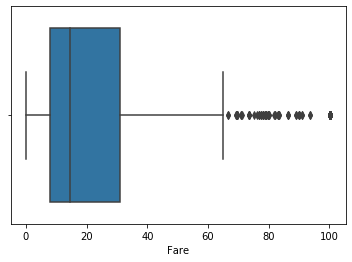

In [467]:
#Checking for Outliers for Fare column seperately
sns.boxplot(df['Fare'])

Some of the outliers have been replaced with lower and upper whiskers

## Zscore Method to remove Outliers

In [468]:
#lets first remove for Age columns
z = np.abs(zscore(df['Age']))

In [469]:
x  = np.where(z>3)
x[0]

array([ 96, 116, 493, 630, 672, 745, 851], dtype=int64)

there are 7 outliers in this column

In [470]:
#Lets remove these outliers
df.drop(x[0],axis = 0,inplace = True)

In [471]:
df.shape

(884, 8)

In [472]:
#lets check for fare column
z = np.abs(zscore(df['Fare']))

In [473]:
np.where(z> 3)


(array([], dtype=int64),)

We don't any outliers in Fare column with zscore method

In [474]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### Skewness Reduction

In [475]:
#skewness Reduction
#lets devide X and Y before handing skewness
Y = df['Survived']
X = df.drop('Survived',axis = 1)

In [476]:
X.skew()

Pclass     -0.640927
Sex        -0.606144
Age         0.334219
SibSp       3.682898
Parch       2.740479
Fare        1.563999
Embarked   -1.271471
dtype: float64

We only check skewness for age  and fare, age is already in the range og -0.5 to +0.5

In [477]:
#Skewness reduction for Fare column
X['Fare'] = np.cbrt(X['Fare'])

In [478]:
X.skew()

Pclass     -0.640927
Sex        -0.606144
Age         0.334219
SibSp       3.682898
Parch       2.740479
Fare        0.425951
Embarked   -1.271471
dtype: float64

Now the skewness is in Range for fare column

### Scaling:

In [479]:
#Scaling the data
scaler  = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.329064,0.125,0.0,0.416605,1.0
1,0.0,0.0,0.573041,0.125,0.0,0.892498,0.0
2,1.0,0.0,0.390058,0.000,0.0,0.429152,1.0
3,0.0,0.0,0.527295,0.125,0.0,0.809052,1.0
4,1.0,1.0,0.527295,0.000,0.0,0.431397,1.0


Now everything is range of 0 and 1

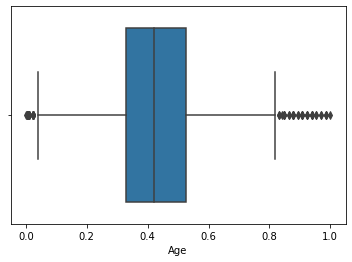

In [480]:
#Checking for Outliers for Age column seperately
sns.boxplot(X['Age'])
plt.show()

Only outliers which are very close to whiskers are present

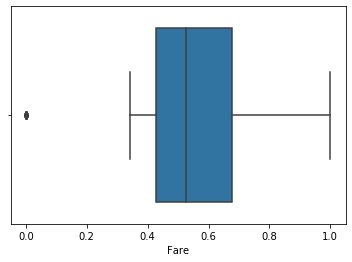

In [481]:
#Checking for Outliers for Fare column seperately
sns.boxplot(X['Fare'])
plt.show()

Almost every outliers has been removed

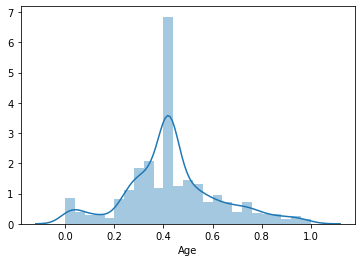

In [482]:
# Lets check the distribution for Age column seperately
sns.distplot(X['Age'])
plt.show()

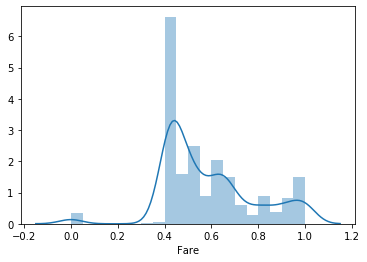

In [483]:
# Lets check the distribution for Fare column seperately
sns.distplot(X['Fare'])
plt.show()

Still it is right Skewed because, most people tend to go low price tickets

## best random_state

In [484]:
maxaccu = 0
rand_state = 0
for i in range(42,100):

    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.22,random_state= i )
    Decision_tree = DecisionTreeClassifier()
    Decision_tree.fit(x_train,y_train)
    pred = Decision_tree.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        rand_state = i
print('Best accuracy is {} on random state {}'.format(maxaccu,rand_state)) 

Best accuracy is 0.8564102564102564 on random state 90


In [485]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 90


In [486]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.22,random_state= 90 )

## Model selection:

In [487]:
#lets Choose Among this Five Models
lg = LogisticRegression()
dtc = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [488]:
model_list = [dtc,lg,knn,svc,rf,ada]
least_diffrence = []
for m in model_list:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('The accuracy of {} is {}'.format(m,accu))
    cv = cross_val_score(m,X,Y,cv =5)
    print("cross val score :",  cv.mean())
    diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
    least_diffrence.append((m,diffrence))
    print('diffrence b/w accurancy score and cross val score is :',diffrence)
    for i in ([0,1]):
        f1 = f1_score(y_test,pred,pos_label=i)
        print("f1 score for {} is {} ".format(i,f1))



DecisionTreeClassifier()
[[100  18]
 [ 14  63]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       118
           1       0.78      0.82      0.80        77

    accuracy                           0.84       195
   macro avg       0.83      0.83      0.83       195
weighted avg       0.84      0.84      0.84       195

The accuracy of DecisionTreeClassifier() is 0.8358974358974359
cross val score : 0.7783127889060092
diffrence b/w accurancy score and cross val score is : 0.057584646991426736
f1 score for 0 is 0.8620689655172413 
f1 score for 1 is 0.7974683544303799 


LogisticRegression()
[[105  13]
 [ 20  57]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       118
           1       0.81      0.74      0.78        77

    accuracy                           0.83       195
   macro avg       0.83      0.82      0.82       195
weighted avg       0.83      0.83      0.83       195

In [489]:
least_diffrence

[(DecisionTreeClassifier(), 0.057584646991426736),
 (LogisticRegression(), 0.04115058670143423),
 (KNeighborsClassifier(), 0.04643978902453472),
 (SVC(), 0.03445142428193271),
 (RandomForestClassifier(), 0.033929911896013576),
 (AdaBoostClassifier(), 0.04695488127691527)]

Least diffrence is for Support Vector Classifier

So, Lets choose SVC as final Model

## Hyperparameter Tuning:

In [490]:
# lets create the parameter list to pass in GridsearchCv
parameters = {'kernel':['linear', 'poly', 'rbf'],'gamma' : ['scale', 'auto'],'degree':list(range(0,11))}

In [491]:
gsv = GridSearchCV(estimator= svc , param_grid = parameters,cv =5)

In [492]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [493]:
gsv.best_params_

{'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

we got the best parameters using grid search cv {'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

## Creating a Final Model as Decision tree:

In [494]:
final_mod = SVC(kernel='poly',degree=4,gamma='scale',probability=True)
final_mod.fit(x_train,y_train)
pred = final_mod.predict(x_test)
accu =accuracy_score(y_test,pred)
print(accu*100)

85.12820512820512


In [495]:
#lets check cross val score for final model
cv = cross_val_score(final_mod,X,Y,cv =5)

In [496]:
#cross val score very near to our model score, so the model is not overfitted
cv.mean()

0.8133731381612737

## Saving the best model:

In [497]:
import joblib
joblib.dump(final_mod,'titanic_final.obj')

['titanic_final.obj']

In [498]:
titanic_final = joblib.load('titanic_final.obj')

In [499]:
accuracy_score(titanic_final.predict(x_test),y_test)

0.8512820512820513

## AUC ROC curve :

Since we have SVC as our final , lets check out the auc roc curve and score

In [500]:
final_mod.score(x_train,y_train)

0.8214804063860668

In [501]:
y_pred_prob = final_mod.predict_proba(x_test)[:,1]

In [502]:
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob)

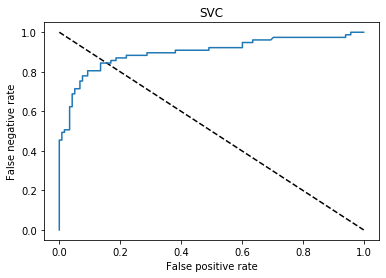

In [503]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Support Vector')
plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.title('SVC')
plt.show()

AUC - ROC curve is graphical representation of confusion matrix

In [504]:
final_mod.fit(x_train,y_train)
log_pred = final_mod.predict(x_test)
accu =accuracy_score(y_test,log_pred)
print(accu*100)
print("AUC ROC Score: ",roc_auc_score(y_test,log_pred))

85.12820512820512
AUC ROC Score:  0.8252256218357914
